In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import scipy
from scipy.stats import shapiro,ttest_ind,mannwhitneyu

# Data Warehouse
    Read the CSV file

In [2]:
Data=pd.read_csv('DS - Part3 - CompanyX_EU.csv')
nData=pd.read_csv('DS - Part3 - CompanyX_EU.csv',index_col=0)

# Data Exploration
   1. Check the datatypes of each attribute

In [3]:
Data.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

# 
    2.Check for null values in the attribtes
        Number of Null values in each attribte

In [4]:
Data.isna().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

In [5]:
null=pd.isnull(nData)
null

,Product,Funding,Event,Result,OperatingState
Startup,,,,,
2600Hz,False,True,False,False,False
3DLT,False,False,False,False,False
3DPrinterOS,False,True,False,False,False
3Dprintler,False,False,False,False,False
42 Technologies,False,True,False,False,False
...,...,...,...,...,...
Zivity,False,False,False,False,False
Zmorph,False,False,False,False,False
Zocdoc,False,False,False,False,False


# 
    Rows with Null value in Product attribte

In [6]:
null=pd.isnull(nData)
null=null[null['Product']==True]
null.index.values

array(['IMO', 'keenkong', 'LocalHero Inc.', 'MotherKnows', 'Rainbow',
       'Tello Applications'], dtype=object)

#    
    Rows with Null value in Funding attribte

In [7]:
null=pd.isnull(nData)
null=null[null['Funding']==True]
null.index.values

array(['2600Hz', '3DPrinterOS', '42 Technologies', '8020 Media',
       'About Last Night', 'Adgregate Markets', 'Affective Interfaces',
       'AirWander', 'Alfabetic', 'Allre', 'Alpha Outlook', 'Altwork',
       'Amaryllis Nucleics', 'Anquanbao', 'Ansa', 'AppArchitect',
       'Arctuition', 'Arrived', 'Artomatix', 'Artveoli, Inc.', 'Athla',
       'Audioo', 'Bark Technologies', 'Bidzy', 'BLITAB Technology',
       'Bojam', 'Bravo Tip or Pay', 'Breakthrough Partners', 'Breinify',
       'BrightContext', 'BroadPeak Partners', 'Cake Financial',
       'CardFlick', 'Cardify', 'Careticker', 'CareZapp', 'Causecast',
       'ChompOn', 'Chronos Mobile Technologies', 'Churn Labs', 'Chyngle',
       'Clixtr', 'Cloudwear, Inc.', 'Connective Logic', 'CoroNet',
       'Cosmic', 'CrowdSpirit', 'CUJO', 'Curiator', 'Current Labs',
       'Cyfeon Solutions', 'Donde', 'Dryft', 'Emerginvest',
       'EnergyElephant', 'exchangeP', 'Exversion', 'FairFleet', 'FAROO',
       'Filter.ly', 'Fit Analytics', '

# 
    Rows with Null value in Event attribte

In [8]:
null=pd.isnull(nData)
null=null[null['Event']==True]
null

,Product,Funding,Event,Result,OperatingState
Startup,,,,,


     
    Rows with Null value in Result attribte

In [9]:
null=pd.isnull(nData)
null=null[null['Result']==True]
null.index.values

array([], dtype=object)

#   
    Rows with Null value in OperatingState attribte

In [10]:
null=pd.isnull(Data)
null=null[null['OperatingState']==True]
null.index.values

array([], dtype=int64)

# Data Preprocessing and Visalisation
    Drop the null values

In [11]:
MData=Data.dropna()
MData.reset_index(drop=True, inplace=True)

In [12]:
MData["Funding"]= MData["Funding"].str.replace("$", "")
MData["Funding"]=MData['Funding'].replace({'K': '*1e3', 'M': '*1e6','B':'*1e9'}, regex=True).map(pd.eval).astype(int)
MData

,Startup,Product,Funding,Event,Result,OperatingState
0,3DLT,3dlt.com,630000,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,1000000,Disrupt NY 2016,Audience choice,Operating
2,5to1,5to1.com,19300000,TC50 2009,Contestant,Acquired
3,8 Securities,8securities.com,29000000,Disrupt Beijing 2011,Finalist,Operating
4,AdhereTech,adheretech.com,1800000,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
441,Zivity,zivity.com,8000000,TC40 2007,Contestant,Operating
442,Zmorph,zmorph3d.com,1000000,-,Audience choice,Operating
443,Zocdoc,zocdoc.com,223000000,TC40 2007,Contestant,Operating
444,Zula,zulaapp.com,3400000,Disrupt SF 2013,Audience choice,Operating


# 
Plot Box plot for funds in million 

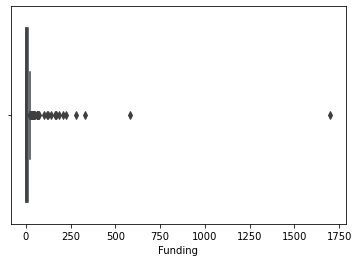

In [13]:
milMData = MData.copy(deep=True)
milMData['Funding']=milMData['Funding'].apply(lambda x: x /1000000)
milMData
sns.boxplot(milMData['Funding'],);

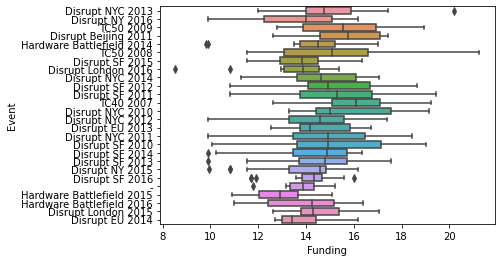

In [14]:
logMData = MData.copy(deep=True)
logMData['Funding']=logMData['Funding'].apply(lambda x: np.log(x))
logMData
sns.boxplot(logMData['Funding'],logMData['Event']);

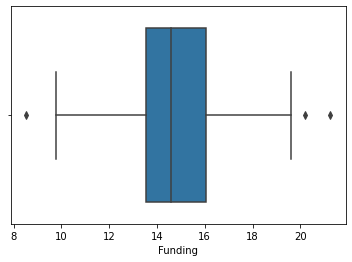

In [15]:
sns.boxplot(logMData['Funding']);


Get the Lower fence from the box plot

In [16]:
q1=MData["Funding"].quantile(0.25)
q3=MData["Funding"].quantile(0.75)
IQR = q3-q1
lower_fence=q1-(1.5*IQR)
upper_fence=q3+(1.5*IQR)
lower_fence,upper_fence

(-12349375.0, 22569625.0)

# 
Check number of outliers greater than upper fence.

In [17]:
Funding=MData["Funding"].values
count=0
i=MData["Funding"].shape[0]-1
while i:
    if Funding[i]>upper_fence:
        count=count+1
    i=i-1

print("number of outliers")
count

number of outliers


60

# 
    Drop values greater than upper fence

In [18]:
aMData=MData.to_numpy()

In [19]:
i=MData["Funding"].shape[0]-1
while i:
    if aMData[[i],[2]]>upper_fence:
        ind=MData.iloc[[i],[1]].index
        MData=MData.drop(index=i,axis=0)
        
    i=i-1

In [20]:
MData

,Startup,Product,Funding,Event,Result,OperatingState
0,3DLT,3dlt.com,630000,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,1000000,Disrupt NY 2016,Audience choice,Operating
2,5to1,5to1.com,19300000,TC50 2009,Contestant,Acquired
4,AdhereTech,adheretech.com,1800000,Hardware Battlefield 2014,Contestant,Operating
5,AdRocket,adrocket.com,1000000,TC50 2008,Contestant,Closed
...,...,...,...,...,...,...
434,Yap,yapme.com,10000000,TC40 2007,Contestant,Closed
435,YayPay Inc,yaypay.com,900000,Disrupt London 2015,Contestant,Operating
441,Zivity,zivity.com,8000000,TC40 2007,Contestant,Operating
442,Zmorph,zmorph3d.com,1000000,-,Audience choice,Operating


In [21]:
milMData = MData.copy(deep=True)
milMData['Funding']=milMData['Funding'].apply(lambda x: x /1000000)
milMData

,Startup,Product,Funding,Event,Result,OperatingState
0,3DLT,3dlt.com,0.63,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,1.00,Disrupt NY 2016,Audience choice,Operating
2,5to1,5to1.com,19.30,TC50 2009,Contestant,Acquired
4,AdhereTech,adheretech.com,1.80,Hardware Battlefield 2014,Contestant,Operating
5,AdRocket,adrocket.com,1.00,TC50 2008,Contestant,Closed
...,...,...,...,...,...,...
434,Yap,yapme.com,10.00,TC40 2007,Contestant,Closed
435,YayPay Inc,yaypay.com,0.90,Disrupt London 2015,Contestant,Operating
441,Zivity,zivity.com,8.00,TC40 2007,Contestant,Operating
442,Zmorph,zmorph3d.com,1.00,-,Audience choice,Operating


# 
Box Plot after dropping the values

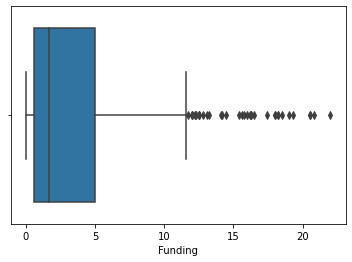

In [22]:
sns.boxplot(milMData['Funding'],);

# 
    Frequency of OperatingState classes

In [23]:
print(MData['OperatingState'].value_counts())

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64


# 
    Plot Funds in Million

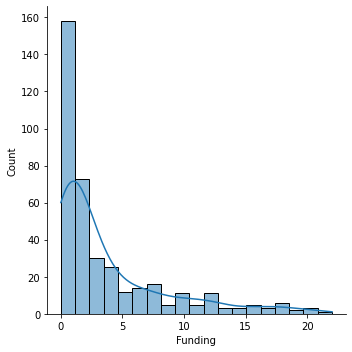

In [24]:
sns.displot(data=milMData,x="Funding",kde=True)


    distribution plot for companies still operating and closed

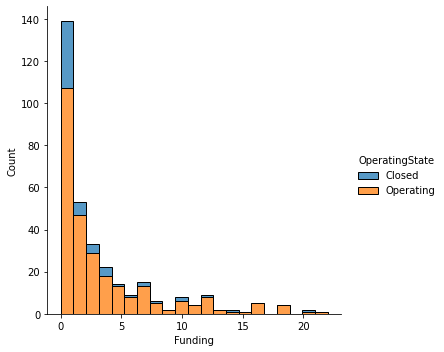

In [25]:
condition=["Closed" , "Operating"]
omilMData=milMData.loc[milMData['OperatingState'].isin(condition)]
sns.displot(data=omilMData, x="Funding", hue="OperatingState", multiple="stack")


# Statistical Analysis

# 
Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
Write the null hypothesis and alternative hypothesis.
Test for significance and conclusion

In [26]:
Operating=MData[MData['OperatingState']=='Operating']['Funding']
Closed=MData[MData['OperatingState']=='Closed']['Funding']

#Null Hypothesis
# There is no significant difference between funds raised by Operating and Closed companies
#Alternate Hypothesis 
#There is  significant difference between funds raised by Operating and Closed companies
pvalue=mannwhitneyu(Operating,Closed)[1]
pvalue

0.04654998649785855

In [27]:
if pvalue<0.05:
    print("Null Hypothesis Rejected")
    print("There is  significant difference between funds raised by Operating and Closed companies")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is no  significant difference between funds raised by Operating and Closed companies")

Null Hypothesis Rejected
There is  significant difference between funds raised by Operating and Closed companies


 
    Make a copy of the original data frame.

In [28]:
Copy_Data=Data.copy(deep=True)

# 
    Check frequency distribution of Result variable.

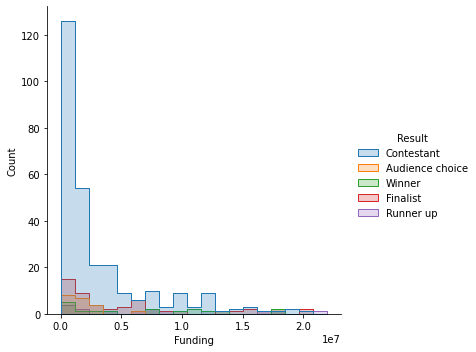

In [29]:
sns.displot(MData, x="Funding", hue="Result", element="step")

# 
    Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [30]:
Operating=MData[MData['OperatingState']=='Operating']['Result'].values
WinnerOpcount=0
ContestantOpcount=0
i=Operating.shape[0]-1
while i:
    if Operating[i]=='Winner':
        WinnerOpcount=WinnerOpcount+1
    if Operating[i]=='Contestant':
        ContestantOpcount=ContestantOpcount+1
    i=i-1
print("Percent of winners Operating=")
print((WinnerOpcount*100)/(Operating.shape[0]-1))
print("Percent of Contestant Operating=")
print((ContestantOpcount*100)/(Operating.shape[0]-1))
Operating=MData[MData['OperatingState']=='Operating']['Result']

Percent of winners Operating=
4.37956204379562
Percent of Contestant Operating=
70.8029197080292


# 
    Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
Write the null hypothesis and alternative hypothesis.
Test for significance and conclusion

In [31]:
Winner=MData[MData['Result']=='Winner']['Funding'].values
Contestant=MData[MData['Result']=='Contestant']['Funding'].values

#Null Hypothesis
# There is no significant difference between companies Operating between winners and contestants 
#Alternate Hypothesis 
#There is  significant difference between companies Operating between winners and contestants 
pvalue=mannwhitneyu(Winner,Contestant)[1]

if pvalue<0.05:
    print("Null Hypothesis Rejected")
    print("There is  significant difference between funds raised by Operating and Closed companies")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is no  significant difference between funds raised by Operating and Closed companies")

Null Hypothesis Rejected
There is  significant difference between funds raised by Operating and Closed companies



    Check distribution of the Event variable

In [32]:
MData['Event'].value_counts() 

TC50 2008                    25
TC40 2007                    22
Disrupt NY 2015              21
Disrupt SF 2011              19
Disrupt NYC 2013             19
Disrupt NYC 2012             19
Disrupt SF 2014              19
Disrupt SF 2013              19
Disrupt SF 2015              19
TC50 2009                    19
Disrupt SF 2016              17
Disrupt NY 2016              16
Disrupt NYC 2011             15
Disrupt SF 2012              15
Disrupt NYC 2014             15
Disrupt SF 2010              13
Hardware Battlefield 2016    12
Hardware Battlefield 2014    12
Disrupt London 2015          11
Disrupt EU 2014              10
Hardware Battlefield 2015    10
Disrupt NYC 2010             10
Disrupt London 2016          10
Disrupt EU 2013               9
-                             6
Disrupt Beijing 2011          4
Name: Event, dtype: int64

# 
• Select only the Event that has disrupt keyword from 2013 onwards.

In [33]:
OnMData=MData[MData['Event'].str.contains('2013|2014|2015|2016',regex=True)]
OnMData

,Startup,Product,Funding,Event,Result,OperatingState
0,3DLT,3dlt.com,630000,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,1000000,Disrupt NY 2016,Audience choice,Operating
4,AdhereTech,adheretech.com,1800000,Hardware Battlefield 2014,Contestant,Operating
6,Agrilyst,agrilyst.com,1000000,Disrupt SF 2015,Winner,Operating
7,Aiden,aiden.ai,750000,Disrupt London 2016,Contestant,Operating
...,...,...,...,...,...,...
428,Wiivv,wiivv.com,12200000,Hardware Battlefield 2016,Runner up,Operating
430,Workspot,workspot.com,15800000,Disrupt NYC 2013,Contestant,Operating
431,Xendo,xendo.com,28000,Disrupt SF 2014,Contestant,Acquired
435,YayPay Inc,yaypay.com,900000,Disrupt London 2015,Contestant,Operating


# 
    Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards.

In [34]:
ConNYOnMData=OnMData[OnMData['Event'].str.contains('NY',regex=True)]
ConEUOnMData=OnMData[OnMData['Event'].str.contains('EU',regex=True)]
ConSFOnMData=OnMData[OnMData['Event'].str.contains('SF',regex=True)]
FConEUOnMData=ConEUOnMData['Funding']
FConNYOnMData=ConNYOnMData['Funding']
FConSFOnMData=ConSFOnMData['Funding']

#Null Hypothesis
# There is no significant difference between funds raised by Operating and Closed companies
#Alternate Hypothesis 
#There is  significant difference between funds raised by Operating and Closed companies
pvalue1=mannwhitneyu(FConEUOnMData,FConNYOnMData)[1]
pvalue2=mannwhitneyu(FConSFOnMData,FConNYOnMData)[1]
pvalue3=mannwhitneyu(FConSFOnMData,FConEUOnMData)[1]
if pvalue1<0.05:
    print("There is  significant difference between funds raised during EU and NY events 2013 onwards")
if pvalue1>=0.05:
    print("There is no  significant difference between funds raised during EU and NY events 2013 onwards")
if pvalue2<0.05:
    print("There is  significant difference between funds raised during SF and NY events 2013 onwards")
if pvalue2>=0.05:
    print("There is no  significant difference between funds raised during SF and NY events 2013 onwards")
if pvalue3<0.05:
    print("There is  significant difference between funds raised during SF and EU events 2013 onwards")
if pvalue3>=0.05:
    print("There is no  significant difference between funds raised during SF and EU events 2013 onwards")


There is no  significant difference between funds raised during EU and NY events 2013 onwards
There is no  significant difference between funds raised during SF and NY events 2013 onwards
There is no  significant difference between funds raised during SF and EU events 2013 onwards


# 
    Plot the distribution plot comparing the 3 city events.

<AxesSubplot:ylabel='Funds'>

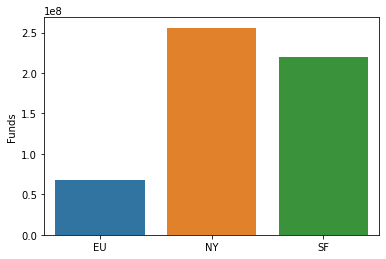

In [35]:
EUsum=FConEUOnMData.sum()
NYsum=FConNYOnMData.sum()
SFsum=FConSFOnMData.sum()
Sum=pd.DataFrame(np.array([[EUsum],[NYsum],[SFsum]]),index=['EU', 'NY', 'SF'],columns=['Funds'])
sns.barplot( x=Sum.index,y="Funds", data=Sum)

# 
    
   Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to performa better data analysis.

# 
 
 Increase in Quantity of data can help with more precise analysis and bell curve with better placement

Increase in quality of data could have minimise the preprocessing measures and usage of log function. The presence of 
String inplace of integer in the Funding lead to more pre processing step hence more time complexity.

Presence of Funding in integer could have helped with time complexity.

Presence of null values eliminated the better precision of analysis.